In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("./special_symbols_100000.csv", encoding='latin1', usecols=lambda column: column != 'URL')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: './special_symbols_100000.csv'

In [ ]:
data.shape

(99207, 39)

In [ ]:
total = data[data['phishing'] == 1]
total

,is_ip,server_client_domain,email_in_url,response_time,qty_ip_resolved,tls_ssl_certificate,qty_redirects,url_shortened,url_google_index,domain_spf,...,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,length_url,phishing
49377,0,0,0,0.520612,1,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,30,1
49378,0,0,0,-1.000000,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,30,1
49379,0,0,0,-1.000000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,38,1
49380,0,0,0,-1.000000,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,72,1
49381,0,0,0,-1.000000,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,0,0,0,-1.000000,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,63,1
99203,0,0,0,0.457486,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,106,1
99204,0,0,0,-1.000000,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,76,1
99205,0,0,0,-1.000000,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,93,1


In [ ]:
data['qty_tld_url'] = pd.to_numeric(data['qty_tld_url'], errors='coerce', downcast='integer').fillna(0).astype(int)

In [ ]:
nulldata = data.isnull().sum()
print(nulldata)
nulldata[nulldata>0]

is_ip                     0
server_client_domain      0
email_in_url              0
response_time             0
qty_ip_resolved           0
tls_ssl_certificate       0
qty_redirects             0
url_shortened             0
url_google_index          0
domain_spf                0
tld_presencet_params      0
ttl_value                 0
asn_ip                    0
qty_tld_url               0
time_domain_activation    0
time_domain_expiration    0
qty_mx_servers            0
qty_hashtag_url           0
qty_underline_domain      0
unsimiler                 0
tld_class                 0
qty_dot_url               0
qty_hyphen_url            0
qty_underline_url         0
qty_slash_url             0
qty_questionmark_url      0
qty_equal_url             0
qty_at_url                0
qty_and_url               0
qty_exclamation_url       0
qty_space_url             0
qty_tilde_url             0
qty_comma_url             0
qty_plus_url              0
qty_asterisk_url          0
qty_dollar_url      

Series([], dtype: int64)

In [ ]:
x = data.drop(columns = 'phishing')
y = data[['phishing']]
x.shape, y.shape

((99207, 38), (99207, 1))

### Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 99)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((69444, 38), (29763, 38), (69444, 1), (29763, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear')

In [ ]:
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8165171521688002

In [ ]:
classifier.score(x_train,y_train)

0.8136196071654859

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (col != 'phishing'):
        col_list.append(col)
        
X = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]

print(vif_data)

                   feature       VIF
0                    is_ip  5.538269
1     server_client_domain  1.003632
2             email_in_url  2.117803
3            response_time  1.694907
4          qty_ip_resolved  1.285574
5      tls_ssl_certificate  1.758124
6            qty_redirects       NaN
7            url_shortened       NaN
8         url_google_index  1.020142
9               domain_spf  1.621111
10    tld_presencet_params  5.539655
11               ttl_value  1.050996
12                  asn_ip  1.044650
13             qty_tld_url  1.307377
14  time_domain_activation  0.000000
15  time_domain_expiration  0.000000
16          qty_mx_servers  1.629807
17         qty_hashtag_url  1.003757
18    qty_underline_domain  1.005531
19               unsimiler  1.249489
20               tld_class  1.291496
21             qty_dot_url  1.718549
22          qty_hyphen_url  1.254512
23       qty_underline_url  1.212825
24           qty_slash_url  1.304713
25    qty_questionmark_url  2.228576
2

In [ ]:
# FI = vif_data[(vif_data['VIF'] < 5)]
FI = vif_data[(vif_data['VIF'] < 5) & (vif_data['VIF'] != 0)]
FI

,feature,VIF
1,server_client_domain,1.003632
2,email_in_url,2.117803
3,response_time,1.694907
4,qty_ip_resolved,1.285574
5,tls_ssl_certificate,1.758124
8,url_google_index,1.020142
9,domain_spf,1.621111
11,ttl_value,1.050996
12,asn_ip,1.044650
13,qty_tld_url,1.307377


In [ ]:
x = data[FI.feature]
x.shape

(99207, 29)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 96)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((69444, 29), (29763, 29), (69444, 1), (29763, 1))

### importing Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
def model_development(x_train, y_train, x_test, y_test, model):
    
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"Test Score = {accuracy_score(y_test,y_pred)}\n")
    print(f"Train Score = {model.score(x_train,y_train)}\n")
    print(f"Classification Report = \n{classification_report(y_test,y_pred)}\n")
    cm = confusion_matrix(y_test,y_pred,labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    print("Confusion Matrix:\n")
    disp.plot()
    plt.show()
    print(f"ROC AUC Score = {roc_auc_score(y_test,y_pred)}\n")
    print(RocCurveDisplay.from_predictions(y_test,y_pred),"\n")
    roc_curve_display = RocCurveDisplay.from_estimator(model,x_test,y_test)
    false_positives = cm[0, 1] # FP
    false_negatives = cm[1, 0] # FN
    FP_rate = false_positives/len(y_test)
    FN_rate = false_negatives/len(y_test)
    
    print(roc_curve_display,"\n")
    print(f"AUC score from estimators = {roc_curve_display.roc_auc}")
    return {"Training Score":model.score(x_train,y_train),
            "Testing Score":accuracy_score(y_test,y_pred),
            "precision":report['1']['precision'], 
            "Recall":report['1']['recall'],
            "F1-score":report['1']['f1-score'],
            "Classifier AUC score":roc_auc_score(y_test,y_pred),
            "Estimator AUC score":roc_curve_display.roc_auc, 
            "FP 佔比": FP_rate, 
            "FN 佔比": FN_rate
           }

In [ ]:
results = {}

### Logistic Regression

Test Score = 0.8214897691764943

Train Score = 0.8215396578538102

Classification Report = 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     14767
           1       0.84      0.80      0.82     14996

    accuracy                           0.82     29763
   macro avg       0.82      0.82      0.82     29763
weighted avg       0.82      0.82      0.82     29763


Confusion Matrix:



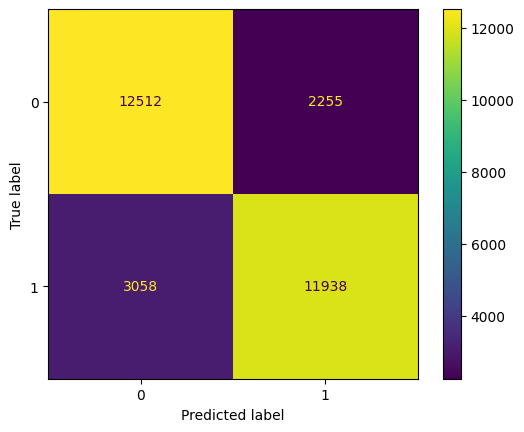

ROC AUC Score = 0.8216867989248048



AUC score from estimators = 0.9011836216526208


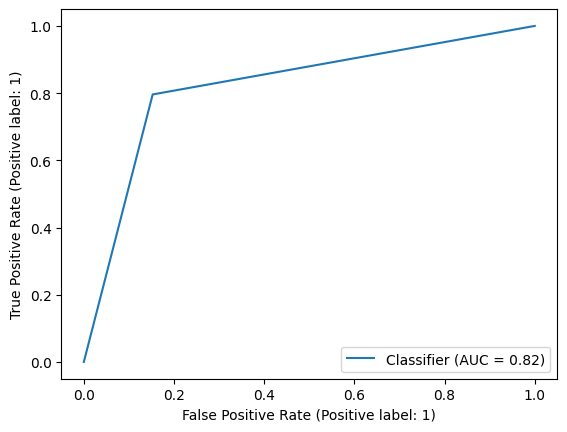

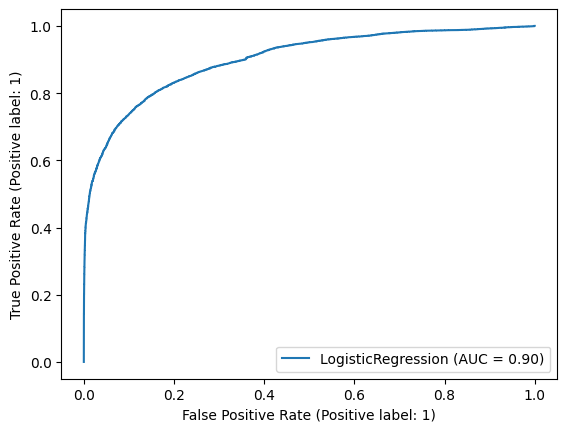

In [ ]:
LogReg = LogisticRegression(C = 1, penalty = 'l1', max_iter = 200, solver = 'liblinear')
'''
param_grid = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2'], 
    'max_iter':[100, 200, 300], 
    'class_weight':['balance']
}

grid_search = GridSearchCV(LogReg, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
'''
LogReg.fit(x_train,y_train)
results['Logistic Regression'] = model_development(x_train, y_train, x_test, y_test, LogReg)

### Decision Tree


Test Score = 0.8877129321640964

Train Score = 0.9228299061113991

Classification Report = 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     14767
           1       0.89      0.88      0.89     14996

    accuracy                           0.89     29763
   macro avg       0.89      0.89      0.89     29763
weighted avg       0.89      0.89      0.89     29763


Confusion Matrix:



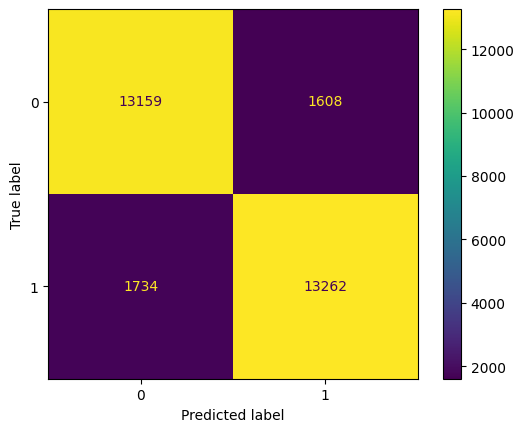

ROC AUC Score = 0.8877388589825168



AUC score from estimators = 0.9413064336625521


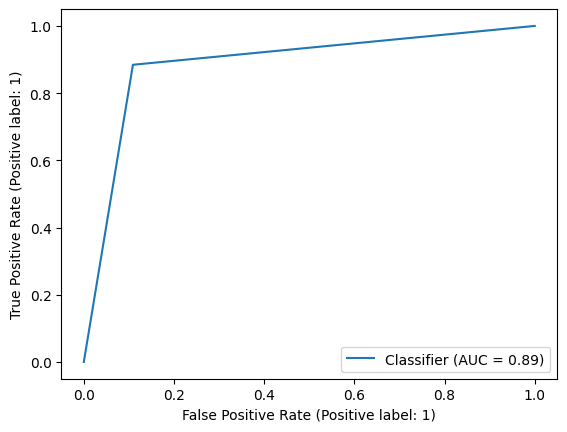

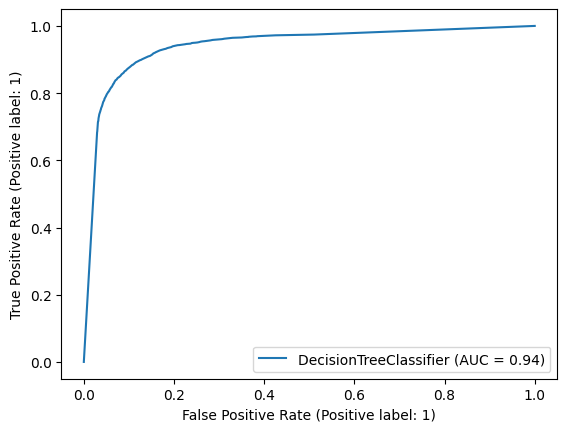

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter='best')


# param_grid = {
#     'criterion':['gini', 'entropy'],
#     'splitter':['best', 'random'], 
#     'max_depth': [10, 15],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [1, 2],
#     'max_features': [None]
# }
# grid_search = GridSearchCV(DecisionTree, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

DecisionTree.fit(x_train,y_train)

results['Decision Tree'] = model_development(x_train, y_train, x_test, y_test, DecisionTree)


### Random Forest Classifier

Test Score = 0.9129792023653529

Train Score = 0.9869967167789874

Classification Report = 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     14767
           1       0.92      0.90      0.91     14996

    accuracy                           0.91     29763
   macro avg       0.91      0.91      0.91     29763
weighted avg       0.91      0.91      0.91     29763


Confusion Matrix:



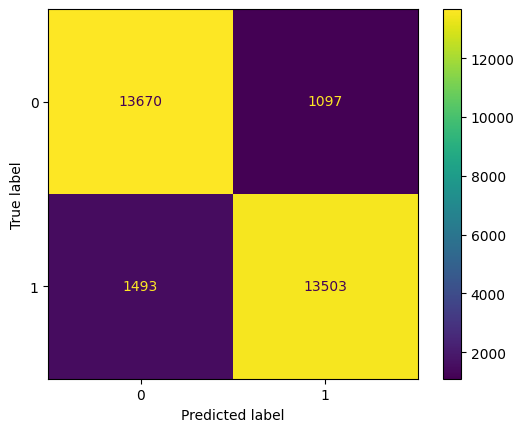

ROC AUC Score = 0.9130764276130392



AUC score from estimators = 0.9711013476644041


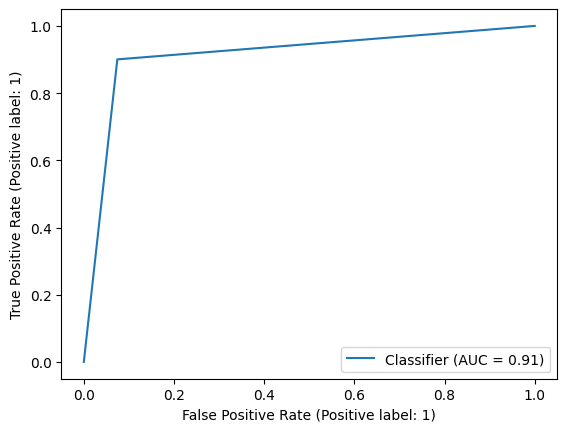

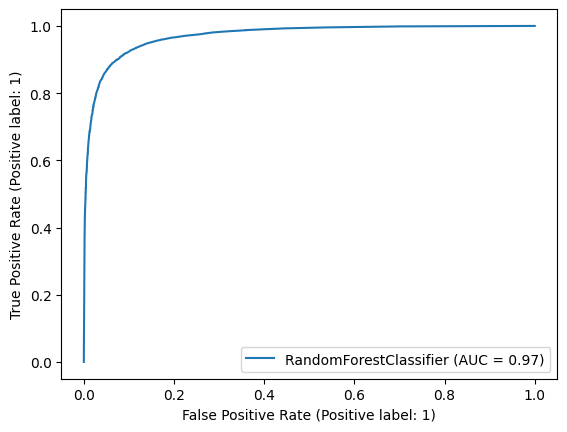

In [ ]:
RandomForest = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 350)
# max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 350
'''
param_grid = {
    'n_estimators': [200, 300, 350, 400],
    'max_depth': [3, 5, None],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(RandomForest, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
'''
RandomForest.fit(x_train,y_train)
results['Random Forest'] = model_development(x_train, y_train, x_test, y_test, RandomForest)

### Naive Bayes

Test Score = 0.7786513456304808

Train Score = 0.7802689937215598

Classification Report = 
              precision    recall  f1-score   support

           0       0.74      0.86      0.79     14767
           1       0.84      0.70      0.76     14996

    accuracy                           0.78     29763
   macro avg       0.79      0.78      0.78     29763
weighted avg       0.79      0.78      0.78     29763


Confusion Matrix:



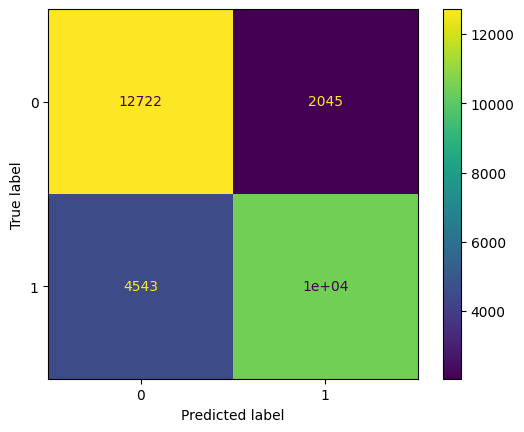

ROC AUC Score = 0.7792840443779298



AUC score from estimators = 0.8415215367334001


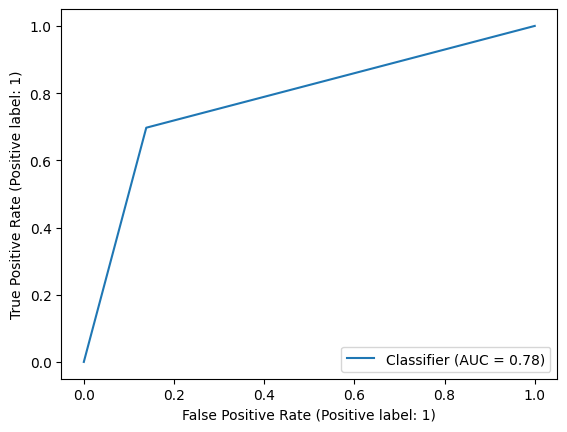

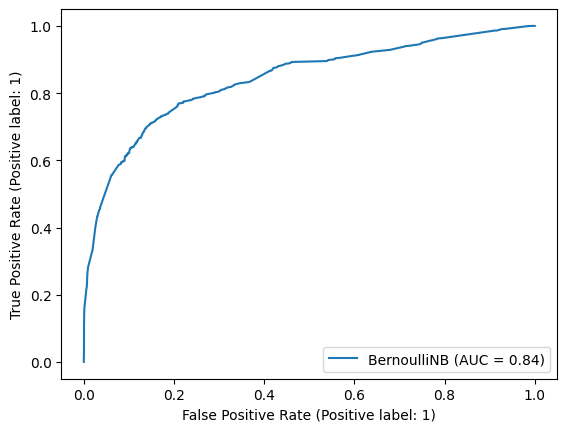

In [ ]:
Naive = BernoulliNB()
Naive.fit(x_train,y_train)
results['Naive Bayes'] = model_development(x_train, y_train, x_test, y_test, Naive)

### Support Vector Machine

Test Score = 0.7879582031381245

Train Score = 0.790305857957491

Classification Report = 
              precision    recall  f1-score   support

           0       0.76      0.83      0.80     14767
           1       0.82      0.75      0.78     14996

    accuracy                           0.79     29763
   macro avg       0.79      0.79      0.79     29763
weighted avg       0.79      0.79      0.79     29763


Confusion Matrix:



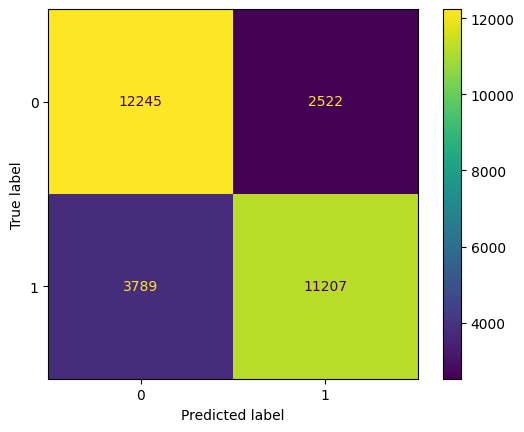

ROC AUC Score = 0.7882732047658478



AUC score from estimators = 0.8323160933026306


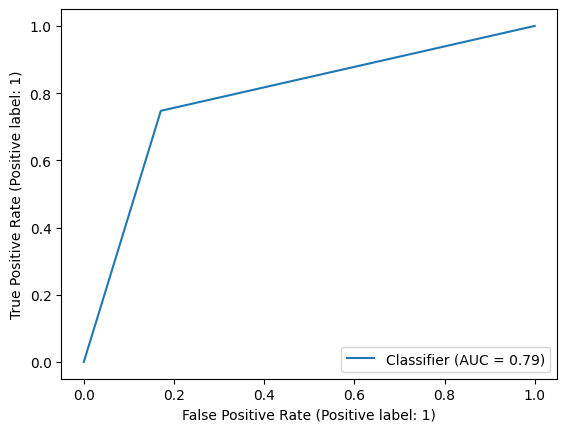

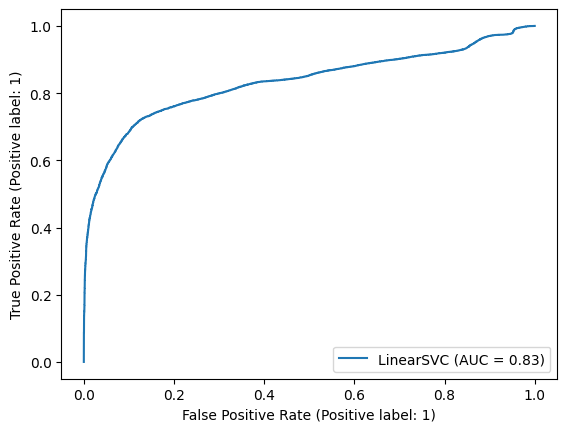

In [ ]:
SVC = LinearSVC()
''''
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'degree':[2, 3, 4]
}
grid_search = GridSearchCV(SVC, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
'''
SVC.fit(x_train, y_train)

results['Support Vector Machine'] = model_development(x_train, y_train, x_test, y_test,SVC)

### XG Boost Classifier

Test Score = 0.9114336592413399

Train Score = 0.9277547376303208

Classification Report = 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     14767
           1       0.91      0.91      0.91     14996

    accuracy                           0.91     29763
   macro avg       0.91      0.91      0.91     29763
weighted avg       0.91      0.91      0.91     29763


Confusion Matrix:



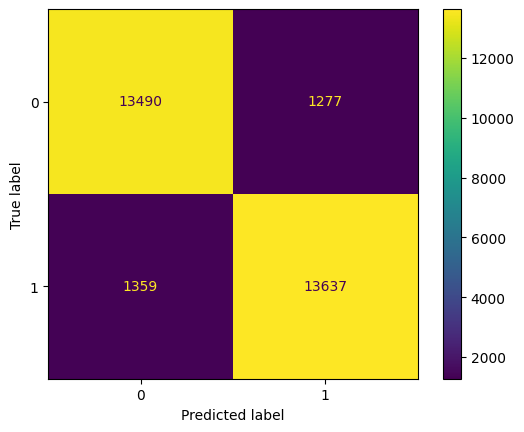

ROC AUC Score = 0.9114496151593338



AUC score from estimators = 0.9728925772273839


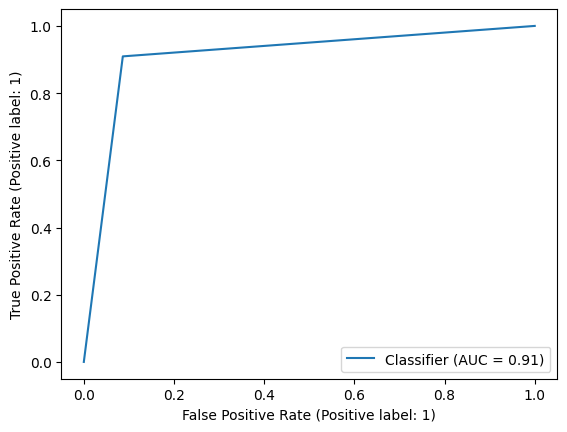

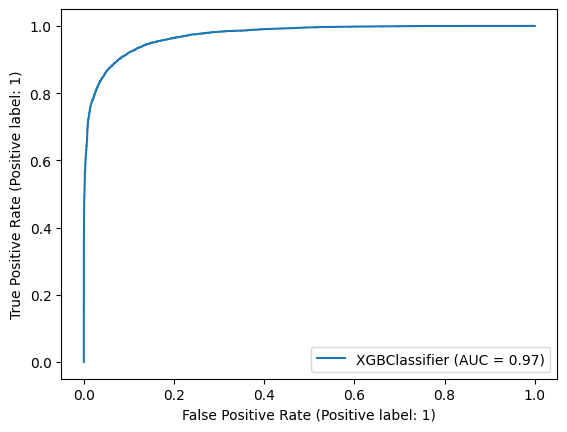

In [ ]:
XGBoost = XGBClassifier(max_depth = None, n_estimators = 350, learning_rate = 0.1)
'''
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

grid_search = GridSearchCV(XGBoost, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
'''
XGBoost.fit(x_train, y_train)
results['XG Boost'] = model_development(x_train, y_train, x_test, y_test, XGBoost)

### Light GBM Classifier

[LightGBM] [Info] Number of positive: 34834, number of negative: 34610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 69444, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501613 -> initscore=0.006451
[LightGBM] [Info] Start training from score 0.006451
Test Score = 0.9032019621677922

Train Score = 0.9098410229825471

Classification Report = 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     14767
           1       0.91      0.90      0.90     14996

    accuracy                           0.90     29763
   macro avg       0.90      0.90      0.90     29763
weighted avg       0.90      0.90      0.90     29763


Confusion Matrix:



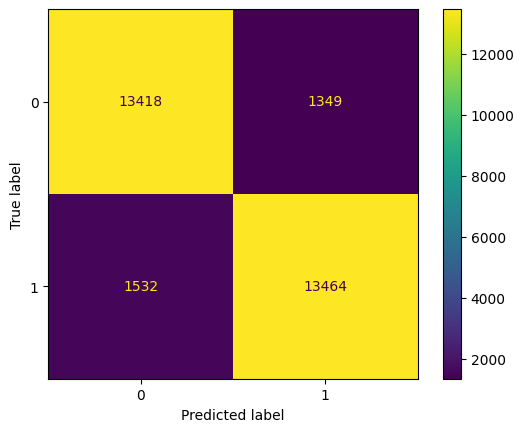

ROC AUC Score = 0.903243542085027



AUC score from estimators = 0.9687746194407401


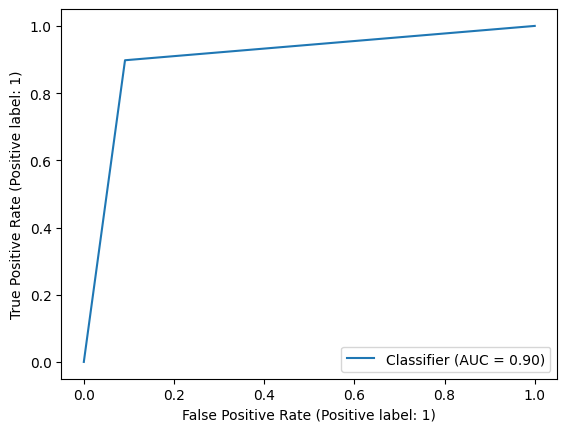

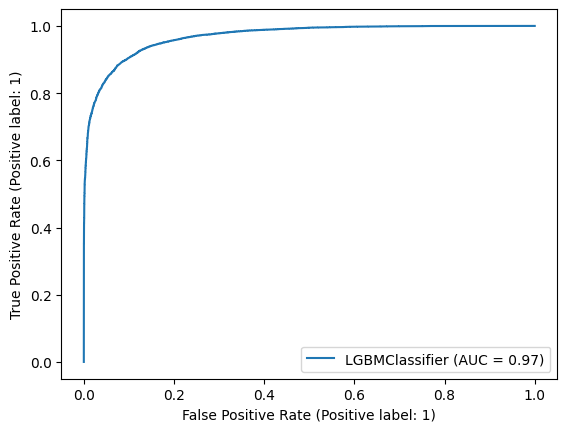

In [ ]:
LightGBM = LGBMClassifier()
LightGBM.fit(x_train, y_train)
results['Light GBM'] = model_development(x_train, y_train, x_test, y_test, LightGBM)

### Multilayer Perceptron Neural Network

Test Score = 0.8231697073547694

Train Score = 0.8266372904786591

Classification Report = 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     14767
           1       0.90      0.73      0.81     14996

    accuracy                           0.82     29763
   macro avg       0.83      0.82      0.82     29763
weighted avg       0.83      0.82      0.82     29763


Confusion Matrix:



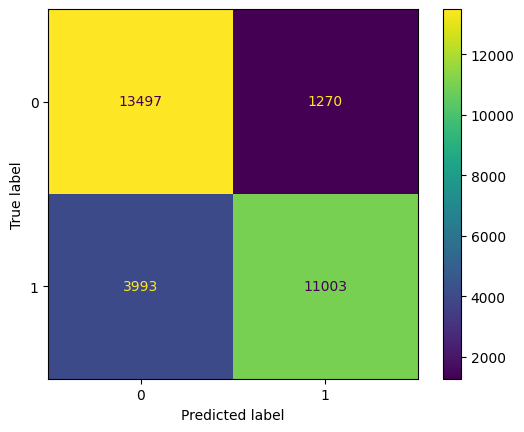

ROC AUC Score = 0.8238632105465817



AUC score from estimators = 0.8632706989623091


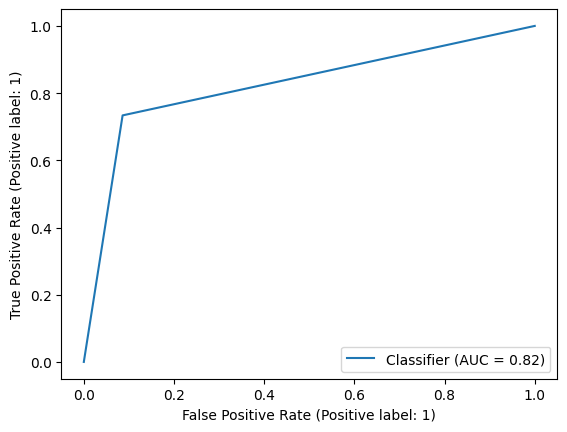

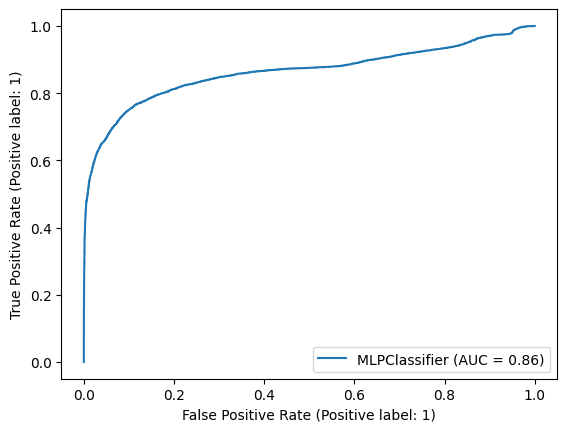

In [ ]:
MLP = MLPClassifier()
MLP.fit(x_train, y_train)
results['MLP Neural Network'] = model_development(x_train, y_train, x_test, y_test, MLP)

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Random Forest,Naive Bayes,Support Vector Machine,XG Boost,Light GBM,MLP Neural Network
Training Score,0.821540,0.922830,0.986997,0.780269,0.790306,0.927755,0.909841,0.826637
Testing Score,0.821490,0.887713,0.912979,0.778651,0.787958,0.911434,0.903202,0.823170
precision,0.841119,0.891863,0.924863,0.836374,0.816301,0.914376,0.908931,0.896521
Recall,0.796079,0.884369,0.900440,0.697053,0.747333,0.909376,0.897839,0.733729
F1-score,0.817979,0.888100,0.912488,0.760384,0.780296,0.911869,0.903351,0.806997
Classifier AUC score,0.821687,0.887739,0.913076,0.779284,0.788273,0.911450,0.903244,0.823863
Estimator AUC score,0.901184,0.941306,0.971101,0.841522,0.832316,0.972893,0.968775,0.863271
FP 佔比,0.075765,0.054027,0.036858,0.068709,0.084736,0.042906,0.045325,0.042670
FN 佔比,0.102745,0.058260,0.050163,0.152639,0.127306,0.045661,0.051473,0.134160


In [ ]:
import pickle
import gzip
with gzip.GzipFile('./xgboost-iris.pgz', 'w') as f:
    pickle.dump(XGBoost, f)

NameError: name 'XGBoost' is not defined

In [ ]:
# 讀取數據
bad = pd.read_csv("./edutw.csv", encoding='latin1', usecols=lambda column: column != 'URL')
url = pd.read_csv("./edutw.csv", encoding='latin1', usecols=lambda column: column == 'URL')

bad = bad[FI.feature]
# 進行預測
predicted_results = XGBoost.predict(bad)

# 添加 URL 到預測結果 DataFrame
predicted_result = pd.DataFrame({'URL': url['URL'], 'Predicted_result': predicted_results})

# 保存預測結果到 CSV 文件
predicted_result.to_csv('predicted_result.csv', index=False)

# 將 CSV 文件轉換為文本文件
with open('predicted_result.csv', 'r') as f_in:
    with open('predicted_result.txt', 'w') as f_out:
        for line in f_in:
            f_out.write(line)
bad.head()

,server_client_domain,email_in_url,response_time,qty_ip_resolved,tls_ssl_certificate,url_google_index,domain_spf,ttl_value,asn_ip,qty_tld_url,...,qty_questionmark_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_plus_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,length_url
0,0,0,-1.000000,0,0,0,1,0,-1,2,...,0,0,0,0,0,0,0,0,0,22
1,0,0,-1.000000,0,0,0,1,0,-1,2,...,0,0,0,0,0,0,0,0,0,23
2,0,0,-1.000000,0,0,0,1,0,-1,2,...,0,0,0,0,0,0,0,0,0,23
3,0,0,0.086768,1,1,0,1,73346,1,2,...,0,0,0,0,0,0,0,0,0,23
4,0,0,0.757287,1,1,0,1,21598,1,2,...,0,0,0,0,0,0,0,0,0,22
